<a href="https://colab.research.google.com/github/CodexJoe/MechineLearning-/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files

In [6]:
upload = files.upload()

Saving titanic-passengers.csv to titanic-passengers.csv


In [7]:
import pandas as pd

In [8]:
dataset=pd.read_csv("titanic-passengers.csv", sep=";")

In [5]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [9]:
#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    new_data['Embarked'].fillna('S', inplace=True)
    return new_data
data=preprocess_data(dataset)

In [10]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
data = dataset

In [12]:
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

In [14]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,343,2,1,28.0,0,0,13.0000
1,76,3,1,25.0,0,0,7.6500
2,641,3,1,20.0,0,0,7.8542
3,568,3,0,29.0,0,4,21.0750
4,672,1,1,31.0,1,0,52.0000


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 10) #splitting data

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
#applying tree algorithm
tree = DecisionTreeClassifier()
z = tree.fit(x_train, y_train) #fitting our model 

In [20]:
y_predict = tree.predict(x_test) # evaluating our model

In [21]:
from sklearn.metrics import accuracy_score

In [23]:
print("score:{}".format(accuracy_score(y_test, y_predict)))

score:0.770949720670391


In [24]:
import graphviz

In [35]:
from sklearn import tree
dot_tree = tree.export_graphviz(z, out_file=None,)

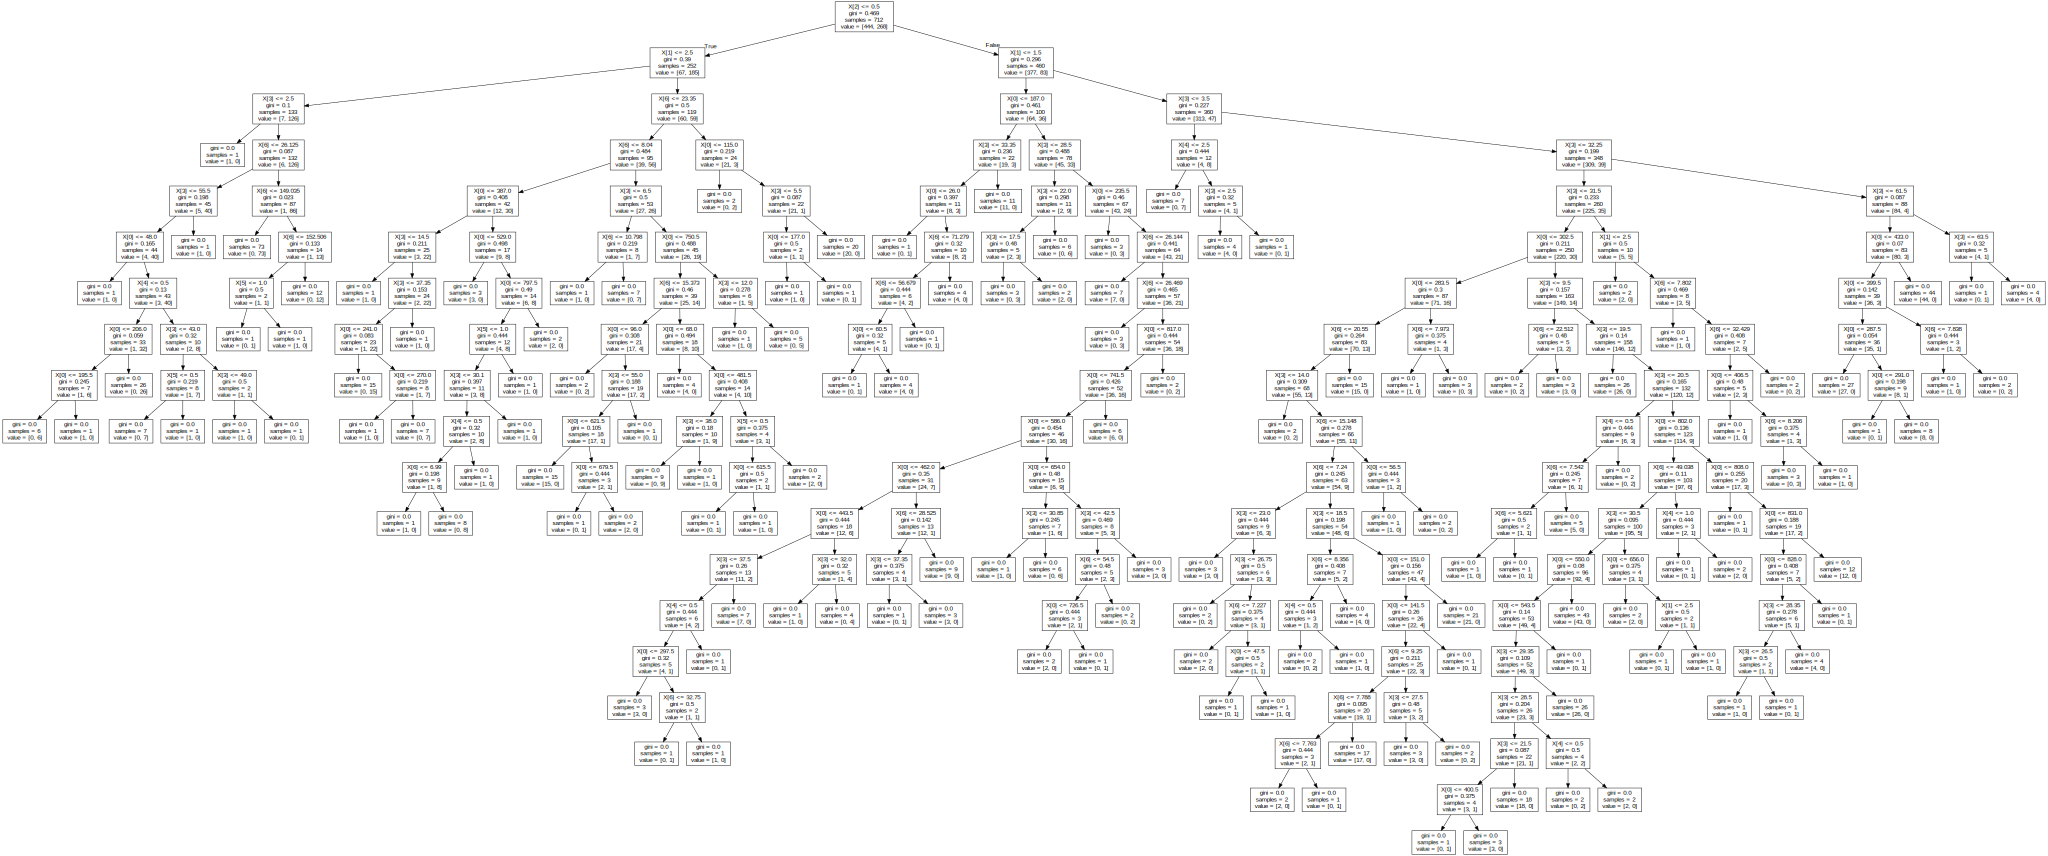

In [38]:
graph = graphviz.Source(dot_tree)
graph.render('data')
graph